# Introduction
TBS

## ETL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math

df = pd.read_csv('poland_basic.csv', sep=';')
df['date'] = pd.to_datetime(df['date'])
df['day'] = range(1, len(df) + 1)
df.head()

,date,infected,day
0,2020-03-04,1,1
1,2020-03-05,1,2
2,2020-03-06,5,3
3,2020-03-07,6,4
4,2020-03-08,11,5


## Define prediction function 

In [2]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

In [3]:
#Use data from 1 to n
df_0 = df
popt_0, pcov_0 = curve_fit(exp_func, df_0['day'], df_0['infected'])
y_0 = exp_func(df_0['day'], *popt_0)

#Use data from 1 to (n-3)
df_3 = df[0 : len(df) - 3]
popt_3, pcov_3 = curve_fit(exp_func, df_3['day'], df_3['infected'])
y_3 = exp_func(df_3['day'], *popt_3)

#Use data from 1 to (n-6)
df_6 = df[0 : len(df) - 6]
popt_6, pcov_6 = curve_fit(exp_func, df_6['day'], df_6['infected'])
y_6 = exp_func(df_6['day'], *popt_6)

## Predict number of infected people for the next few days

In [4]:
last_day = df.tail(1)
last_date = last_day['date']
last_index = last_day['day']

date = last_date + pd.DateOffset(1)
formatted_date = np.datetime_as_string(date, unit='D')[0]

predicted_0 = exp_func(last_index + 1, *popt_0)
predicted_3 = exp_func(last_index + 1, *popt_3)
predicted_6 = exp_func(last_index + 1, *popt_6)

print("Date: {}. Predicted infected people (n): {}".format(formatted_date, int(predicted_0)))
print("Date: {}. Predicted infected people (n-3): {}".format(formatted_date, int(predicted_3)))
print("Date: {}. Predicted infected people (n-6): {}".format(formatted_date, int(predicted_6)))

Date: 2020-03-26. Predicted infected people (n): 1319
Date: 2020-03-26. Predicted infected people (n-3): 1630
Date: 2020-03-26. Predicted infected people (n-6): 2414


## Plot fitted functions

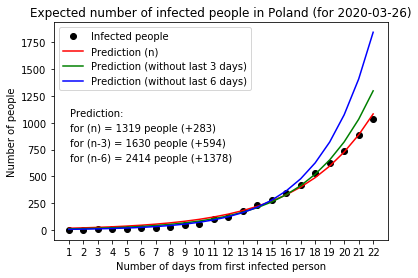

In [5]:
xint = range(math.floor(min(df_0['day'])), math.ceil(max(df_0['day']))+1)

infected_last_day = int(last_day['infected'])

plt.figure()
plt.xticks(xint)

plt.title('Expected number of infected people in Poland (for {})'.format(formatted_date))
plt.xlabel('Number of days from first infected person')
plt.ylabel('Number of people')

plt.plot(df['day'], df['infected'], 'ko', label="Infected people")

plt.plot(df_0['day'], exp_func(df_0['day'], *popt_0), 'r-', label="Prediction (n)")
plt.plot(df_0['day'], exp_func(df_0['day'], *popt_3), 'g-', label="Prediction (without last 3 days)")
plt.plot(df_0['day'], exp_func(df_0['day'], *popt_6), 'b-', label="Prediction (without last 6 days)")

plt.annotate('Prediction:', xy=(0.05, 0.57), xycoords='axes fraction')
plt.annotate('for (n) = {} people (+{})'.format(str(int(predicted_0)), int(predicted_0)-infected_last_day), xy=(0.05, 0.5), xycoords='axes fraction')
plt.annotate('for (n-3) = {} people (+{})'.format(str(int(predicted_3)), int(predicted_3)-infected_last_day), xy=(0.05, 0.43), xycoords='axes fraction')
plt.annotate('for (n-6) = {} people (+{})'.format(str(int(predicted_6)), int(predicted_6)-infected_last_day), xy=(0.05, 0.36), xycoords='axes fraction')

plt.legend()
plt.show()